# IA - Modèle SVM - BDD signaux acceptables

In [62]:
import Fonctions_BDD_Signaux_Artificiels as BDD
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

### Définition de la BDD

In [77]:
liste_comp = BDD.BDD_type('A')

liste_train = []
liste_test = []

for i in range(1,229):
    if i % 4 == 0 :
        liste_test.append(liste_comp[i-1])
    else :
        liste_train.append(liste_comp[i-1])

print("Liste complète", len(liste_comp))
print("75%", len(liste_train))
print("25%", len(liste_test))

Liste complète 228
75% 171
25% 57


### Définition des labels

In [64]:
target_train = []
target_test = []

for i in range(0,43):
    target_train.append(0)
for i in range(43,86):
    target_train.append(1)    
for i in range(86,129):
    target_train.append(2)
for i in range(129,171):
    target_train.append(3)

for i in range(0,14):
    target_test.append(0)
for i in range(14,28):
    target_test.append(1)
for i in range(28,42):
    target_test.append(2)
for i in range(42,57):
    target_test.append(3)

print(len(target_train))
print(len(target_test))

171
57


### Mélange de la BDD

In [65]:
liste_test_s, target_test_s = shuffle(liste_test, target_test)
liste_train_s, target_train_s = shuffle(liste_train, target_train)

### Définition de image

In [66]:
image_train = BDD.return_image(liste_train_s, 'C:/Users/abras/OneDrive - etu.sorbonne-universite.fr/M1/Projet/Projet_final/Sirenes artificielles')
image_test = BDD.return_image(liste_test_s, 'C:/Users/abras/OneDrive - etu.sorbonne-universite.fr/M1/Projet/Projet_final/Sirenes artificielles')

print(image_train.shape)
print(image_test.shape)

(171, 41, 27)
(57, 41, 27)


In [68]:
# On convertit nos valeurs en float

image_train = image_train.astype(float)
image_test = image_test.astype(float)

# On normalise les pixels pour avoir des valeurs entre 0 et 1

image_train = image_train/255
image_test = image_test/255

### Séparation des données

In [70]:
# X_train, X_test, y_train, y_test = train_test_split(image, target_s, test_size=0.1)

nsamples, nx, ny = image_train.shape
d2_train_dataset = image_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = image_test.shape
d2_train_dataset_test = image_test.reshape((nsamples,nx*ny))

nsamples, nx, ny = image.shape
image_t = image.reshape((nsamples,nx*ny))

In [71]:
clf = svm.SVC(kernel='linear')
clf.fit(d2_train_dataset, target_train_s)
y_pred = clf.predict(d2_train_dataset_test)

In [72]:
print("Accuracy:",metrics.accuracy_score(target_test_s, y_pred))

Accuracy: 0.9122807017543859


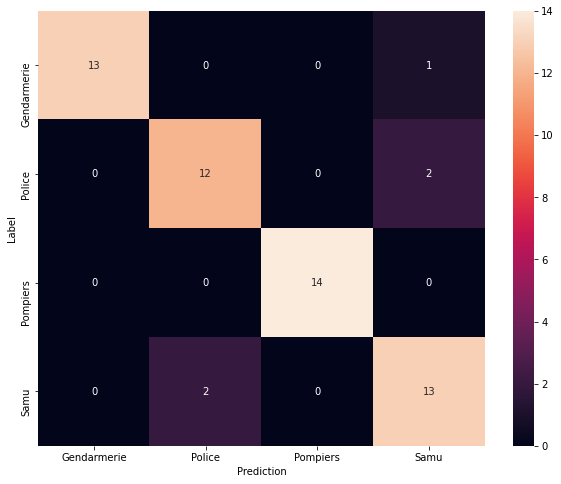

In [75]:
y_true = target_test_s

commands = []
commands.append('Gendarmerie')
commands.append('Police')
commands.append('Pompiers')
commands.append('Samu')

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()